In [37]:
# !pip install datasets pandas matplotlib seaborn wordcloud nltk pymorphy2

In [38]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка датасета
dataset = load_dataset("inkoziev/jokes_dialogues")

df = pd.DataFrame(dataset['train'])

In [39]:
df.head(10)

,reply_num,utterance,src_hash,context
0,1,Частично.,09c7bf7afe752742f295f7f7d1f4f1770a840204,- Ты верующий?
1,2,"В смысле, в бога веришь, а в храм не ходишь?",09c7bf7afe752742f295f7f7d1f4f1770a840204,- Ты верующий?\n- Частично.
2,3,"В смысле, масленицу справляю, а пост не соблюдаю.",09c7bf7afe752742f295f7f7d1f4f1770a840204,"- Ты верующий?\n- Частично.\n- В смысле, в бог..."
3,1,А разве в итальянском салате есть итальянцы?,d9ee3d8343718e7e9f4ec12f0e0bfaecad2896bc,"В ресторане. Посетитель жалуется официанту, чт..."
4,1,Как у тебя насчет контрацептивов?,067f9e01ca34eafe549802850939e3997e69fb14,Разговаривают две подруги.
5,2,"Ах, этот гандон так и не позвонил.",067f9e01ca34eafe549802850939e3997e69fb14,Разговаривают две подруги.\n- Как у тебя насче...
6,1,Кроме этого киоска у Вас есть другие?,79bbcedc7612fea3fc63ae07aa7c5ce54d3e77a2,Пособие для кредитных специалистов\nАдаптация ...
7,2,Навар с этой точки на другие кидаете? А чтоб к...,79bbcedc7612fea3fc63ae07aa7c5ce54d3e77a2,Пособие для кредитных специалистов\nАдаптация ...
8,1,"Это муж, прячься!",30c9cd7a973ea4f4bf32bfc1f321294385240498,"Стандартная ситуация.\nНочь, звонок в дверь."
9,2,Куда?,30c9cd7a973ea4f4bf32bfc1f321294385240498,"Стандартная ситуация.\nНочь, звонок в дверь.\n..."


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114579 entries, 0 to 114578
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   reply_num  114579 non-null  int64 
 1   utterance  114579 non-null  object
 2   src_hash   114579 non-null  object
 3   context    114579 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.5+ MB


In [41]:
df.describe()

,reply_num
count,114579.000000
mean,2.523578
std,2.746731
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,75.000000


In [42]:
# пропуски
df.isnull().sum()

reply_num    0
utterance    0
src_hash     0
context      0
dtype: int64

In [43]:
# Уникальные анекдоты
print(f"Всего уникальных анекдотов: {df['src_hash'].nunique()}")
print(f"Всего реплик: {len(df)}")

# Распределение реплик по анекдотам
print("\n=== Распределение количества реплик в анекдоте ===")
replies_per_joke = df.groupby('src_hash').size()
print(replies_per_joke.describe())

Всего уникальных анекдотов: 49321
Всего реплик: 114579

=== Распределение количества реплик в анекдоте ===
count    49321.000000
mean         2.323128
std          1.938215
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         75.000000
dtype: float64


In [44]:
# Длины реплик и контекстов
df['utterance_length'] = df['utterance'].str.len()
df['context_length'] = df['context'].str.len()
df['utterance_words'] = df['utterance'].str.split().str.len()

print("=== Статистика по длинам ===")
print(df[['utterance_length', 'context_length', 'utterance_words']].describe())

=== Статистика по длинам ===
       utterance_length  context_length  utterance_words
count     114579.000000   114579.000000    114579.000000
mean          44.628405      170.695904         7.614886
std           42.174182      255.265269         6.940041
min            2.000000        2.000000         1.000000
25%           19.000000       53.000000         3.000000
50%           34.000000       99.000000         6.000000
75%           57.000000      196.000000        10.000000
max         1926.000000    11419.000000       327.000000


In [45]:
# Короткий диалог (2-3 реплики)
print("КОРОТКИЙ ДИАЛОГ (2-3 реплики):")
short_jokes = df.groupby('src_hash').size()
short_joke_id = short_jokes[short_jokes == 2].index[5]
short_dialogue = df[df['src_hash'] == short_joke_id].sort_values('reply_num')
for idx, row in short_dialogue.iterrows():
    print(f"\nРеплика {row['reply_num']}: {row['utterance']}")
print(f"\nПолный контекст:\n{short_dialogue.iloc[-1]['context']}")

# Средний диалог (4-6 реплик)
print("\n" + "=" * 80)
print("СРЕДНИЙ ДИАЛОГ (4-6 реплик):")
medium_joke_id = short_jokes[(short_jokes >= 4) & (short_jokes <= 6)].index[3]
medium_dialogue = df[df['src_hash'] == medium_joke_id].sort_values('reply_num')
for idx, row in medium_dialogue.iterrows():
    print(f"\nРеплика {row['reply_num']}: {row['utterance']}")
print(f"\nПолный контекст:\n{medium_dialogue.iloc[-1]['context']}")

# Длинный диалог (10+ реплик)
print("ДЛИННЫЙ ДИАЛОГ (10+ реплик):")
long_joke_id = short_jokes[short_jokes >= 10].index[0]
long_dialogue = df[df['src_hash'] == long_joke_id].sort_values('reply_num')
for idx, row in long_dialogue.iterrows():
    print(f"\nРеплика {row['reply_num']}: {row['utterance']}")
print(f"\nПолный контекст:\n{long_dialogue.iloc[-1]['context']}")

# === РАСПРЕДЕЛЕНИЕ ДЛИН ДИАЛОГОВ ===
print("\n" + "=" * 80)
print("РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА РЕПЛИК")
print("=" * 80)

replies_per_joke = df.groupby('src_hash').size()
print("\nТоп-10 самых частых длин диалогов:")
print(replies_per_joke.value_counts().head(10))

print("\n% диалогов по категориям:")
print(f"1 реплика (однострочные): {(replies_per_joke == 1).sum() / len(replies_per_joke) * 100:.1f}%")
print(f"2 реплики: {(replies_per_joke == 2).sum() / len(replies_per_joke) * 100:.1f}%")
print(f"3 реплики: {(replies_per_joke == 3).sum() / len(replies_per_joke) * 100:.1f}%")
print(f"4-6 реплик: {((replies_per_joke >= 4) & (replies_per_joke <= 6)).sum() / len(replies_per_joke) * 100:.1f}%")
print(f"7-10 реплик: {((replies_per_joke >= 7) & (replies_per_joke <= 10)).sum() / len(replies_per_joke) * 100:.1f}%")
print(f"10+ реплик: {(replies_per_joke > 10).sum() / len(replies_per_joke) * 100:.1f}%")

# === АНАЛИЗ ДЛИННЫХ РЕПЛИК ===
print("\n" + "=" * 80)
print("АНАЛИЗ НЕОБЫЧНО ДЛИННЫХ РЕПЛИК")
print("=" * 80)

# Топ-5 самых длинных реплик
longest_utterances = df.nlargest(5, 'utterance_length')
print("\nТоп-5 самых длинных реплик:")
for idx, row in longest_utterances.iterrows():
    print(f"\nДлина: {row['utterance_length']} символов, {row['utterance_words']} слов")
    print(f"Текст: {row['utterance'][:200]}...")

# === ПРОВЕРКА КАЧЕСТВА ДАННЫХ ===
print("\n" + "=" * 80)
print("ПРОВЕРКА КАЧЕСТВА ДАННЫХ")
print("=" * 80)

# Пустые или очень короткие реплики
very_short = df[df['utterance_length'] <= 3]
print(f"\nОчень короткие реплики (≤3 символа): {len(very_short)}")
if len(very_short) > 0:
    print("Примеры:")
    print(very_short[['utterance', 'utterance_length']].head(10))

# Проверка на дубликаты
print(f"\nДубликаты реплик: {df['utterance'].duplicated().sum()}")
print(f"Дубликаты диалогов (по src_hash): {df['src_hash'].duplicated().sum()} (это нормально, т.к. один анекдот = много реплик)")

КОРОТКИЙ ДИАЛОГ (2-3 реплики):

Реплика 1: Каким образом дышит эмбрион?

Реплика 2: Через влагалище.

Полный контекст:
На экзамене в медицинском. Преп. спрашивает у студента:
- Каким образом дышит эмбрион?
Студент, не задумываясь:

СРЕДНИЙ ДИАЛОГ (4-6 реплик):

Реплика 1: Учитель, где твоя мебель?

Реплика 2: А где твоя?

Реплика 3: Моя? Но ведь я здесь проездом.

Реплика 4: Я тоже.

Полный контекст:
Один турист зашёл к Мудрецу и с удивлением обнаружил, что его жилище состоит лишь из одной полупустой комнаты: стол, лавка - вот и вся мебель.
- Учитель, где твоя мебель? - удивился турист.
- А где твоя? - спросил Мудрец.
- Моя? Но ведь я здесь проездом.
ДЛИННЫЙ ДИАЛОГ (10+ реплик):

Реплика 1: Черный - это цвет.

Реплика 2: Нет, черный это не цвет.

Реплика 3: Да говорю тебе, черный - это цвет.

Реплика 4: Да никогда в жизни!

Реплика 5: Точно говорю, черный - это цвет.

Реплика 6: Ничего подобного.

Реплика 7: Ладно, пойдем спросим у раввина, что Тора об этом говорит.

Реплика 8: Да, в Т

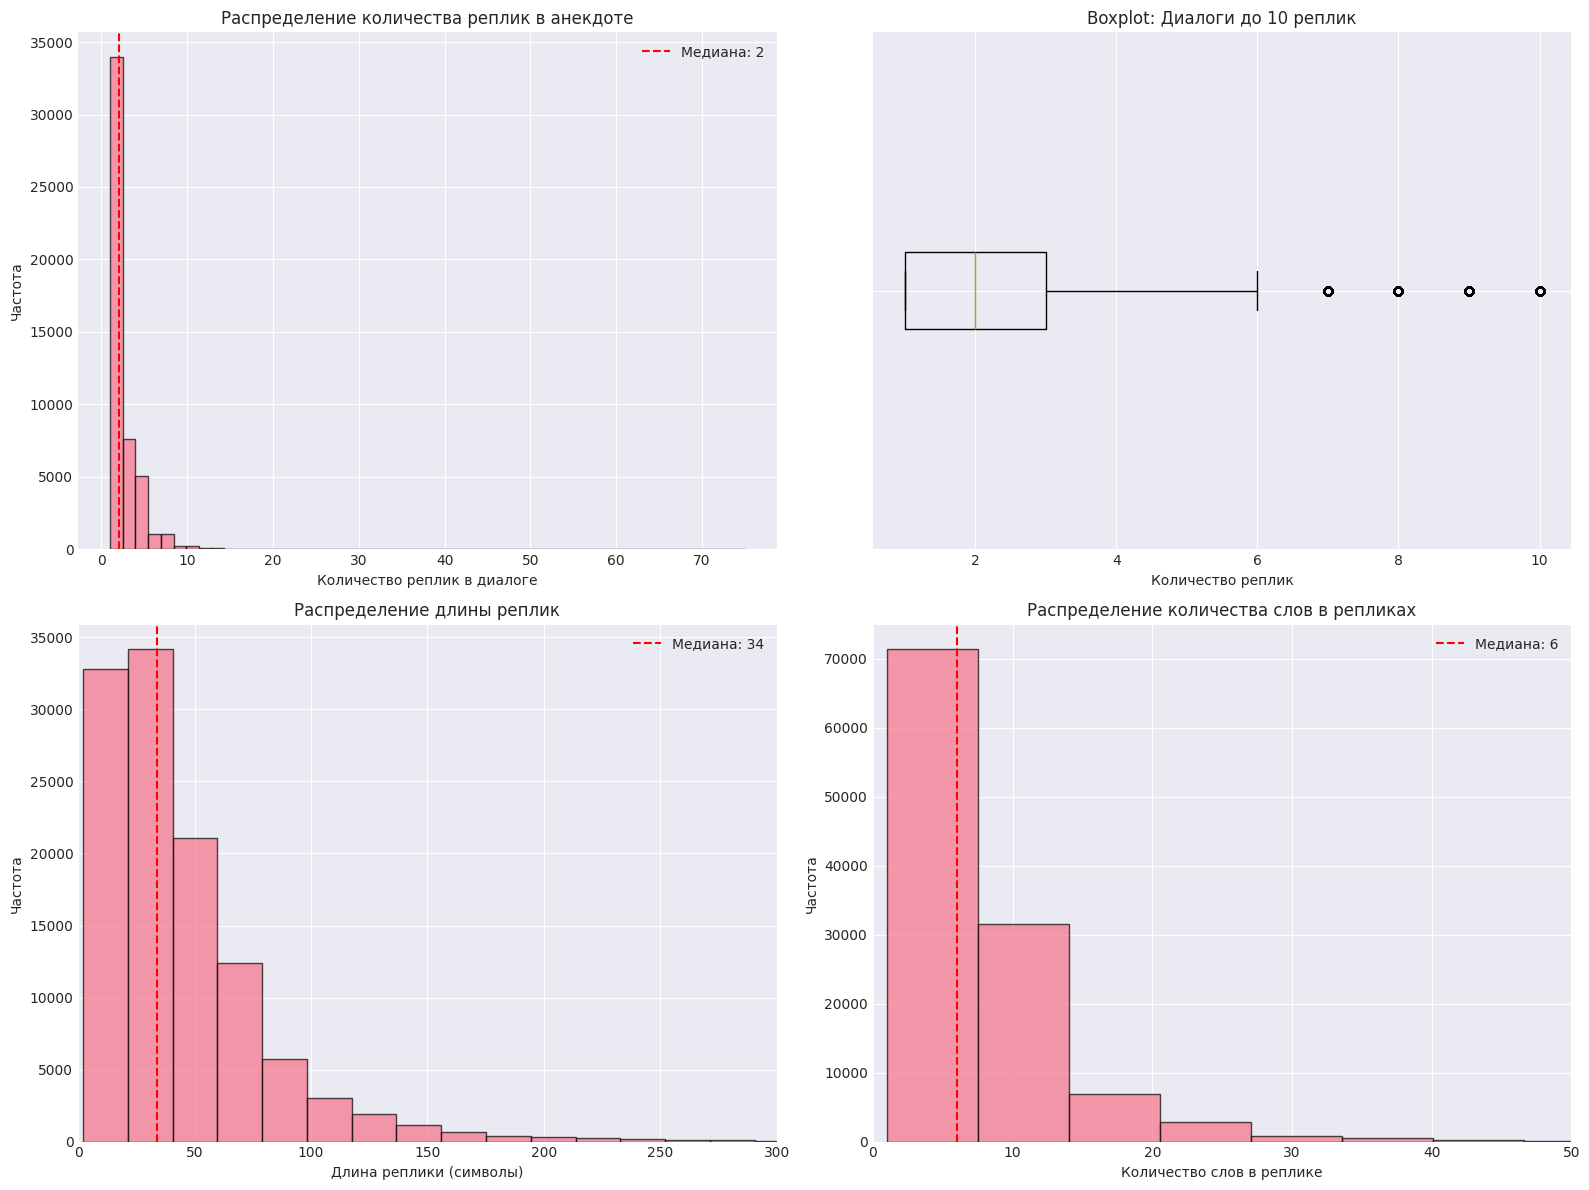

✅ График 1 сохранен: distributions.png


In [46]:
from wordcloud import WordCloud
import re
from collections import Counter

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'DejaVu Sans'

# === 1. РАСПРЕДЕЛЕНИЕ ДЛИН ДИАЛОГОВ ===
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Гистограмма количества реплик в диалоге
replies_per_joke = df.groupby('src_hash').size()
axes[0, 0].hist(replies_per_joke, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Количество реплик в диалоге')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Распределение количества реплик в анекдоте')
axes[0, 0].axvline(replies_per_joke.median(), color='red', linestyle='--', 
                    label=f'Медиана: {replies_per_joke.median():.0f}')
axes[0, 0].legend()

# График 2: Boxplot для коротких диалогов (до 10 реплик)
short_jokes = replies_per_joke[replies_per_joke <= 10]
axes[0, 1].boxplot(short_jokes, vert=False)
axes[0, 1].set_xlabel('Количество реплик')
axes[0, 1].set_title('Boxplot: Диалоги до 10 реплик')
axes[0, 1].set_yticklabels([''])

# График 3: Длина реплик (в символах)
axes[1, 0].hist(df['utterance_length'], bins=100, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Длина реплики (символы)')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title('Распределение длины реплик')
axes[1, 0].axvline(df['utterance_length'].median(), color='red', 
                    linestyle='--', label=f'Медиана: {df["utterance_length"].median():.0f}')
axes[1, 0].set_xlim(0, 300)  # Обрезаем выбросы для наглядности
axes[1, 0].legend()

# График 4: Длина реплик (в словах)
axes[1, 1].hist(df['utterance_words'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Количество слов в реплике')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_title('Распределение количества слов в репликах')
axes[1, 1].axvline(df['utterance_words'].median(), color='red', 
                    linestyle='--', label=f'Медиана: {df["utterance_words"].median():.0f}')
axes[1, 1].set_xlim(0, 50)
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ График 1 сохранен: distributions.png")

Всего слов в датасете: 873775
Уникальных слов: 74205

ТОП-30 САМЫХ ЧАСТЫХ СЛОВ
а                     22199 раз
не                    21728 раз
я                     21076 раз
и                     18557 раз
в                     17626 раз
что                   17176 раз
на                    11971 раз
у                     10404 раз
это                   10162 раз
ты                     9725 раз
да                     9193 раз
ну                     8537 раз
как                    8411 раз
с                      8052 раз
вы                     6952 раз
нет                    6548 раз
так                    6402 раз
то                     6068 раз
меня                   5745 раз
мне                    5419 раз
же                     5122 раз
за                     4637 раз
вот                    4346 раз
он                     4335 раз
но                     4313 раз
все                    3824 раз
по                     3632 раз
вас                    3339 раз
тебя                   30

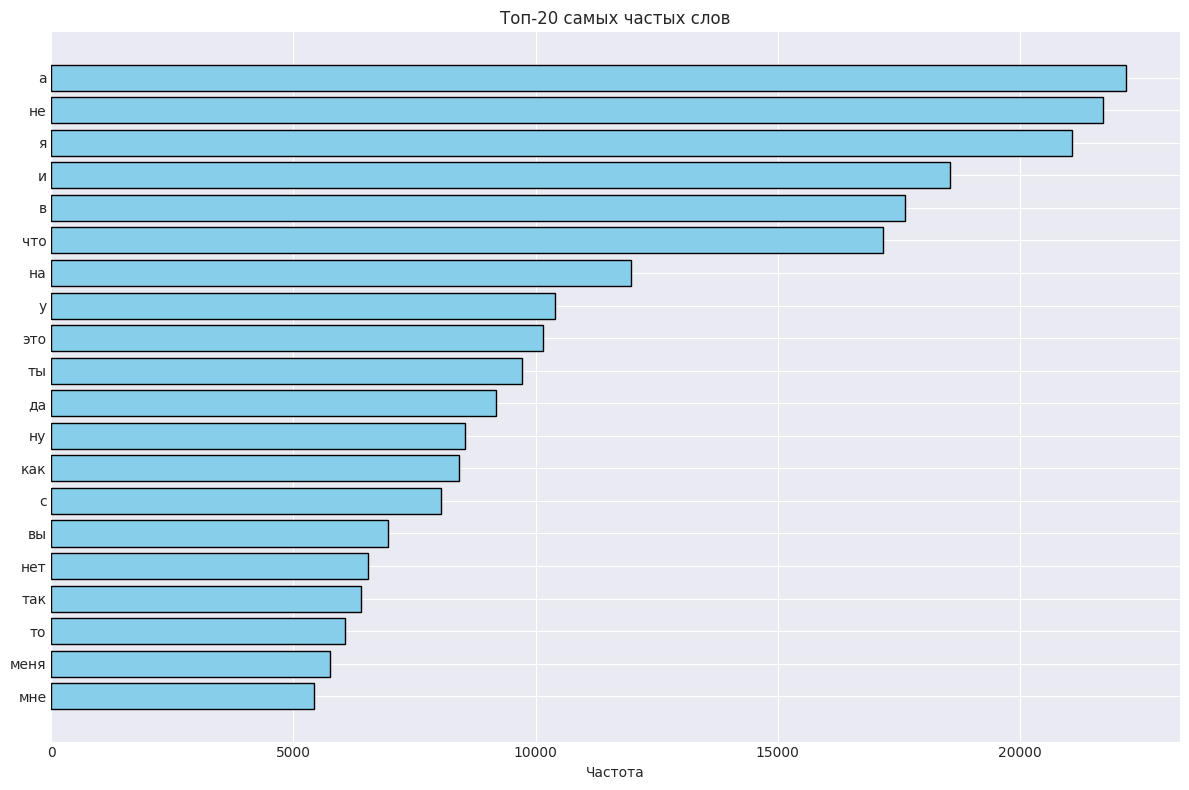


✅ График 2 сохранен: top_words.png


In [47]:
# === 2. ЧАСТОТНЫЙ АНАЛИЗ СЛОВ ===

# Функция для очистки текста
def clean_text(text):
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем пунктуацию, оставляем только буквы и пробелы
    text = re.sub(r'[^\w\s]', ' ', text)
    # Убираем множественные пробелы
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Очищаем все реплики
all_text = ' '.join(df['utterance'].apply(clean_text))
words = all_text.split()

print(f"Всего слов в датасете: {len(words)}")
print(f"Уникальных слов: {len(set(words))}")

# Топ-30 самых частых слов
word_freq = Counter(words)
top_words = word_freq.most_common(30)

print("\n" + "="*60)
print("ТОП-30 САМЫХ ЧАСТЫХ СЛОВ")
print("="*60)
for word, count in top_words:
    print(f"{word:20} {count:6} раз")

# Визуализация топ-20 слов
fig, ax = plt.subplots(figsize=(12, 8))
words_list = [w[0] for w in top_words[:20]]
counts_list = [w[1] for w in top_words[:20]]

ax.barh(words_list, counts_list, color='skyblue', edgecolor='black')
ax.set_xlabel('Частота')
ax.set_title('Топ-20 самых частых слов')
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('top_words.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ График 2 сохранен: top_words.png")

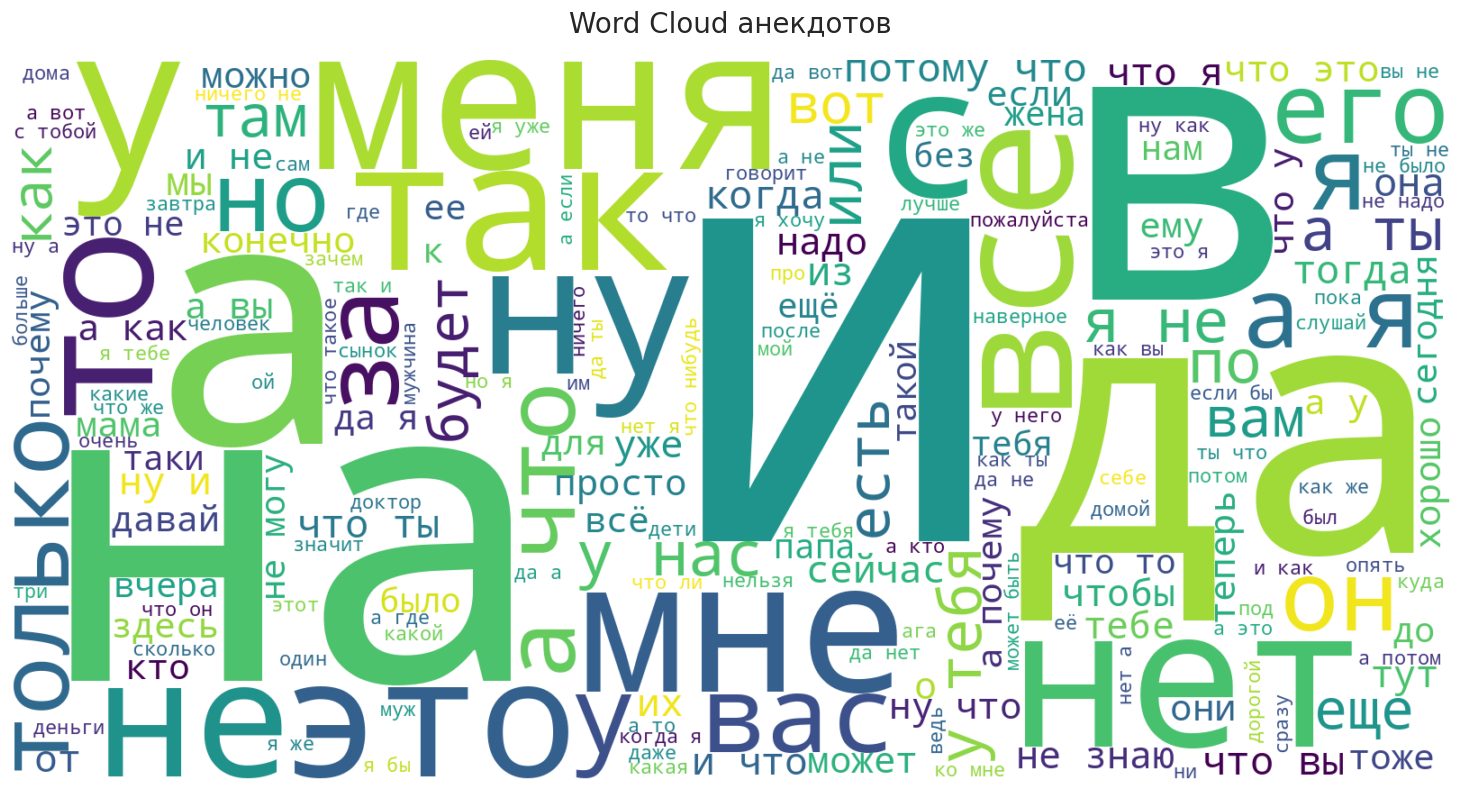


✅ График 3 сохранен: wordcloud.png


In [48]:
# === 3. WORD CLOUD ===

# Создаем word cloud
wordcloud = WordCloud(
    width=1600, 
    height=800,
    background_color='white',
    colormap='viridis',
    max_words=200,
    relative_scaling=0.5,
    min_font_size=10
).generate(all_text)

# Визуализация
fig, ax = plt.subplots(figsize=(16, 8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title('Word Cloud анекдотов', fontsize=20, pad=20)

plt.tight_layout()
plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ График 3 сохранен: wordcloud.png")

In [49]:
from collections import Counter
import nltk
from nltk import ngrams

# стоп-слова для русского
try:
    from nltk.corpus import stopwords
    russian_stopwords = set(stopwords.words('russian'))
except:
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    russian_stopwords = set(stopwords.words('russian'))

# Добавляем дополнительные стоп-слова, характерные для диалогов
custom_stopwords = russian_stopwords.union({
    'это', 'вот', 'да', 'нет', 'ну', 'так', 'же', 'ещё', 'уже', 'тут'
})

print("=" * 80)
print("АНАЛИЗ N-ГРАММ (без стоп-слов)")
print("=" * 80)

# Фильтруем стоп-слова
words_filtered = [w for w in words if w not in custom_stopwords and len(w) > 2]

print(f"\nВсего слов после фильтрации: {len(words_filtered)}")
print(f"Уникальных слов после фильтрации: {len(set(words_filtered))}")

# Топ-20 значимых слов (без стоп-слов)
word_freq_filtered = Counter(words_filtered)
top_words_filtered = word_freq_filtered.most_common(20)

print("\n" + "=" * 60)
print("ТОП-20 ЗНАЧИМЫХ СЛОВ (без стоп-слов)")
print("=" * 60)
for word, count in top_words_filtered:
    print(f"{word:20} {count:6} раз")

# === БИГРАММЫ ===
print("\n" + "=" * 80)
print("ТОП-20 БИГРАММ (пары слов)")
print("=" * 80)

# Создаем биграммы из всех слов (включая стоп-слова для контекста)
bigrams = list(ngrams(words, 2))
bigram_freq = Counter(bigrams)
top_bigrams = bigram_freq.most_common(20)

for bigram, count in top_bigrams:
    print(f"{bigram[0]:15} {bigram[1]:15} {count:5} раз")

# === ТРИГРАММЫ ===
print("\n" + "=" * 80)
print("ТОП-20 ТРИГРАММ (тройки слов)")
print("=" * 80)

trigrams = list(ngrams(words, 3))
trigram_freq = Counter(trigrams)
top_trigrams = trigram_freq.most_common(20)

for trigram, count in top_trigrams:
    print(f"{trigram[0]:12} {trigram[1]:12} {trigram[2]:12} {count:4} раз")

# === АНАЛИЗ СПЕЦИФИЧЕСКИХ СЛОВ ДЛЯ АНЕКДОТОВ ===
print("\n" + "=" * 80)
print("СПЕЦИФИЧЕСКИЕ СЛОВА ДЛЯ АНЕКДОТОВ")
print("=" * 80)

# Ищем слова, связанные с юмором и диалогами
humor_keywords = ['смешно', 'шутка', 'анекдот', 'ржу', 'хаха', 'смеется', 
                  'смеяться', 'прикол', 'смех']
dialogue_keywords = ['говорит', 'спрашивает', 'отвечает', 'сказал', 'спросил',
                     'ответил', 'сказала']

print("\nСлова, связанные с юмором:")
for word in humor_keywords:
    if word in word_freq:
        print(f"  {word}: {word_freq[word]} раз")

print("\nСлова, связанные с диалогом:")
for word in dialogue_keywords:
    if word in word_freq:
        print(f"  {word}: {word_freq[word]} раз")

# === СТАТИСТИКА ПО ПЕРСОНАЖАМ ===
print("\n" + "=" * 80)
print("ПОПУЛЯРНЫЕ ПЕРСОНАЖИ В АНЕКДОТАХ")
print("=" * 80)

characters = ['вовочка', 'штирлиц', 'чапаев', 'петька', 'мужик', 'жена', 
              'муж', 'врач', 'пациент', 'учитель', 'ученик', 'начальник',
              'новый', 'русский', 'еврей', 'чукча', 'мужчина', 'женщина',
              'парень', 'девушка']

character_stats = []
for char in characters:
    if char in word_freq:
        character_stats.append((char, word_freq[char]))

character_stats.sort(key=lambda x: x[1], reverse=True)

print("\nТоп персонажей/типажей:")
for char, count in character_stats[:15]:
    print(f"  {char:15} {count:5} раз")

АНАЛИЗ N-ГРАММ (без стоп-слов)

Всего слов после фильтрации: 465740
Уникальных слов после фильтрации: 73598

ТОП-20 ЗНАЧИМЫХ СЛОВ (без стоп-слов)
тебе                   2822 раз
почему                 2755 раз
просто                 1561 раз
знаю                   1400 раз
очень                  1297 раз
всё                    1258 раз
сколько                1164 раз
могу                   1071 раз
сегодня                1061 раз
хочу                   1055 раз
давай                  1055 раз
таки                   1019 раз
папа                   1009 раз
лет                     999 раз
мама                    974 раз
жена                    961 раз
доктор                  958 раз
вчера                   920 раз
нам                     898 раз
день                    875 раз

ТОП-20 БИГРАММ (пары слов)
у               меня             2797 раз
у               вас              1768 раз
а               что              1468 раз
а               я                1457 раз
у               на

### Выводы

#### 1. Структура датасеты

- 114,579 реплик из 49,321 уникальных анекдотов
- Средняя длина диалога: 2.3 реплики (медиана = 2)
- 69% анекдотов состоят из 1-2 реплик (короткие диалоги)
- Присутствуют длинные диалоги (до 75 реплик), но их <1%

#### 2. Характеристики реплик

- Медианная длина: 34 символа / 6 слов
- Распределение сильно скошено вправо (long-tail)
- Есть выбросы: реплики до 1926 символов (вероятно, setup анекдотов)
- 907 очень коротких реплик (≤3 символа): «Да», «Нет», «Ага»

#### 3. Лексические особенности

- Разговорный стиль: высокая частота местоимений (я, ты, вы, меня)
- Типичные диалоговые конструкции: «у меня», «а что», «не знаю»
- Популярные персонажи: жена, муж, Вовочка, врач, мужик
- Вопросительная модальность: почему, сколько, как

#### 4. Качество данных

- Нет пропущенных значений
- 13,400 дубликатов реплик (типичные фразы повторяются)
- Структура "context" содержит всю предысторию диалога